In [125]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

This is a Califonia Housing dataset taken from kaggle. Dataset has following attributes for each block of group in California:

Population

Median Income

Median Housing Price

And More

In [126]:
# reading the data and looking at the first five rows of the data
data=pd.read_csv("/content/housing.csv")
data.head(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


Now I'm going to use only some important features from the dataset to perform clustering.

In [127]:
data = data[['total_rooms', 'population', 'households', 'median_income', 'median_house_value']]

In [128]:
# statistics of the data
data.describe()

,total_rooms,population,households,median_income,median_house_value
count,9998.000000,9998.000000,9998.000000,9998.000000,9998.000000
mean,2432.451290,1395.712543,483.785257,3.718130,204953.558712
std,2031.200572,1090.886872,379.027871,1.917091,116605.865311
min,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,1355.000000,780.000000,271.000000,2.411100,117925.000000
50%,1962.000000,1137.500000,390.000000,3.328900,176600.000000
75%,2864.750000,1687.000000,576.000000,4.545275,258075.000000
max,32627.000000,28566.000000,6082.000000,15.000100,500001.000000


In [129]:
df=data.dropna()

Here, we see that there is a lot of variation in the magnitude of the data. Variables like medium_income and households have low magnitude whereas variables like total_rooms, population, median_house_value, have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [130]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
data_s=pd.DataFrame(data_scaled).describe()
data_s

,0,1,2,3,4
count,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03,9.998000e+03
mean,-1.573140e-16,2.848292e-17,-4.280766e-18,3.348554e-16,-1.745570e-15
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.196619e+00,-1.276743e+00,-1.271171e+00,-1.678789e+00,-1.629112e+00
25%,-5.304770e-01,-5.644429e-01,-5.614255e-01,-6.818117e-01,-7.463854e-01
50%,-2.316240e-01,-2.367115e-01,-2.474487e-01,-2.030416e-01,-2.431694e-01
75%,2.128398e-01,2.670323e-01,2.433049e-01,4.314801e-01,4.555868e-01
max,1.486611e+01,2.490785e+01,1.477067e+01,5.885237e+00,2.530423e+00


The magnitude looks similar now. Next, let’s create a kmeans function and fit it on the data:

In [131]:

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We have initialized two clusters and pay attention – the initialization is not random here. We have used the k-means++ initialization which generally produces better results.

Remember in lecture we said that this algorithm randomly initialize the centroids in k-means clustering? Well, this is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called K-Means++ that can be used to choose the initial values, or the initial cluster centroids, for K-Means.

In some cases, if the initialization of clusters is not appropriate, K-Means can result in arbitrarily bad clusters. This is where K-Means++ helps. It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.

Using the K-Means++ algorithm, we optimize the step where we randomly pick the cluster centroid. We are more likely to find a solution that is competitive to the optimal K-Means solution while using the K-Means++ initialization.

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [132]:
# inertia on the fitted data
kmeans.inertia_

34832.08017025184

 how can we decide the optimum number of clusters? One thing we can do is plot a graph, also known as an elbow curve, where the x-axis will represent the number of clusters and the y-axis will be an evaluation metric. Let’s say inertia for now.

 We got an inertia value of almost 2600. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

Text(0, 0.5, 'Inertia')

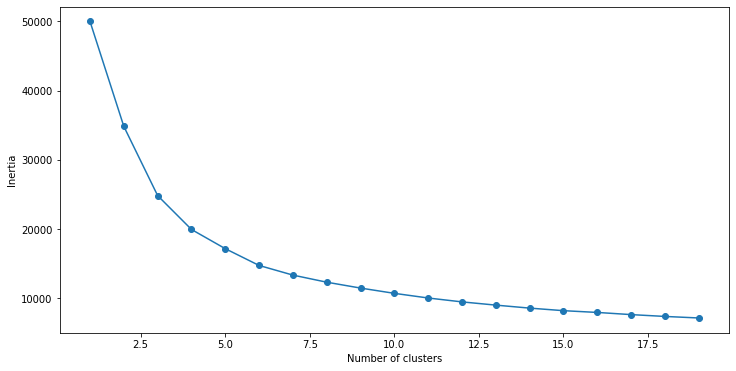

In [133]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Looking at the above elbow curve, we can choose any number of clusters between 4 to 8. Let’s set the number of clusters as 4 and fit the model:

In [134]:
clusters = [4,5,6,7,8]
pred = []

In [135]:
#Storing all the cluster predictions for further plotting
for cluster in clusters:
  kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
  kmeans.fit(data_scaled)
  pred.append(kmeans.predict(data_scaled))

Let's now plot these clusters on a scatter plot.


### Clusters of size 4:

In [176]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[0]

In [177]:
frame['cluster'].unique()

array([3, 0, 2, 1], dtype=int32)

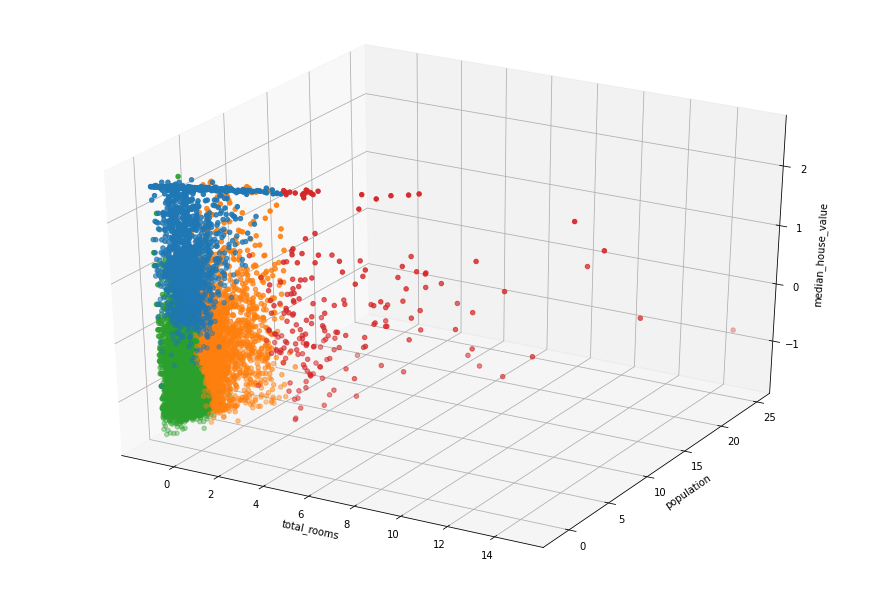

In [178]:
from mpl_toolkits.mplot3d import Axes3D
#total_rooms	population	households	median_income	median_house_value
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
  ax.scatter(frame[frame.cluster==i][0], frame[frame.cluster==i][1], frame[frame.cluster==i][4])
  ax.set_xlabel('total_rooms')
  ax.set_ylabel('population')
  ax.set_zlabel('median_house_value')

### Clusters of size 5:

In [179]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[1]

In [180]:
frame['cluster'].unique()

array([2, 1, 0, 3, 4], dtype=int32)

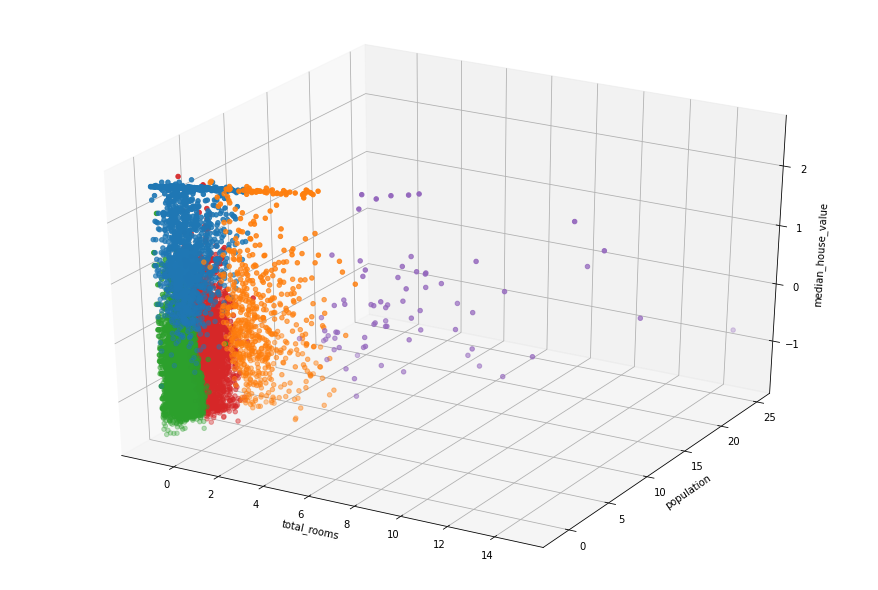

In [181]:
from mpl_toolkits.mplot3d import Axes3D
#total_rooms	population	households	median_income	median_house_value
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
  ax.scatter(frame[frame.cluster==i][0], frame[frame.cluster==i][1], frame[frame.cluster==i][4])
  ax.set_xlabel('total_rooms')
  ax.set_ylabel('population')
  ax.set_zlabel('median_house_value')

### Clusters of size 6:

In [182]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[2]

In [183]:
frame['cluster'].unique()

array([4, 0, 5, 3, 1, 2], dtype=int32)

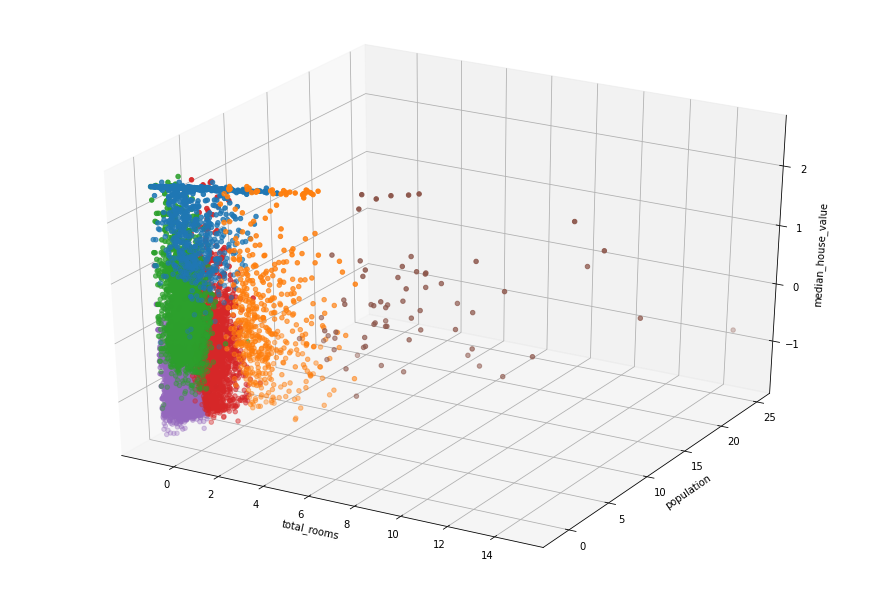

In [184]:
from mpl_toolkits.mplot3d import Axes3D
#total_rooms	population	households	median_income	median_house_value
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
  ax.scatter(frame[frame.cluster==i][0], frame[frame.cluster==i][1], frame[frame.cluster==i][4])
  ax.set_xlabel('total_rooms')
  ax.set_ylabel('population')
  ax.set_zlabel('median_house_value')

### Clusters of size 7:

In [185]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[3]

In [186]:
frame['cluster'].unique()

array([3, 4, 6, 5, 0, 2, 1], dtype=int32)

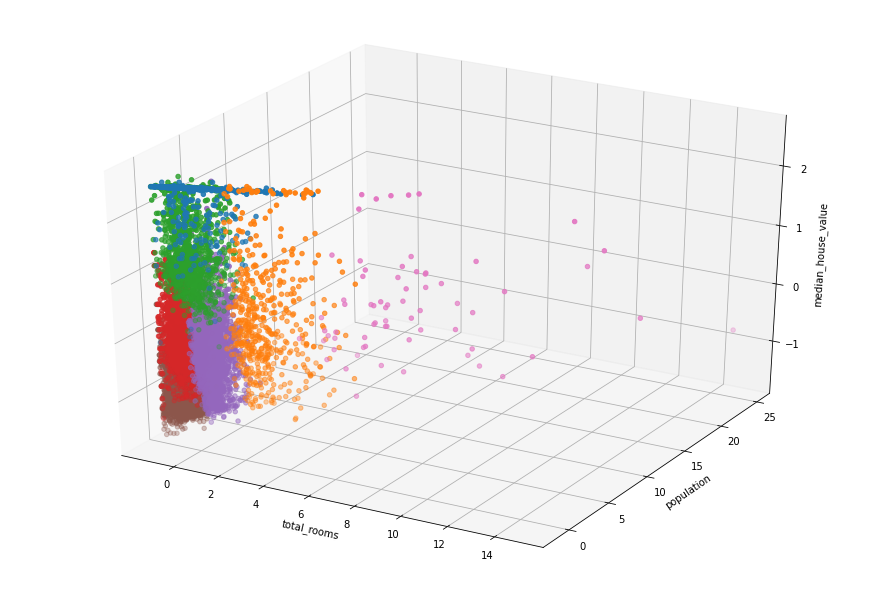

In [187]:
from mpl_toolkits.mplot3d import Axes3D
#total_rooms	population	households	median_income	median_house_value
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
  ax.scatter(frame[frame.cluster==i][0], frame[frame.cluster==i][1], frame[frame.cluster==i][4])
  ax.set_xlabel('total_rooms')
  ax.set_ylabel('population')
  ax.set_zlabel('median_house_value')

### Clusters of size 8:

In [188]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred[4]

In [189]:
frame['cluster'].unique()

array([2, 1, 7, 6, 0, 4, 3, 5], dtype=int32)

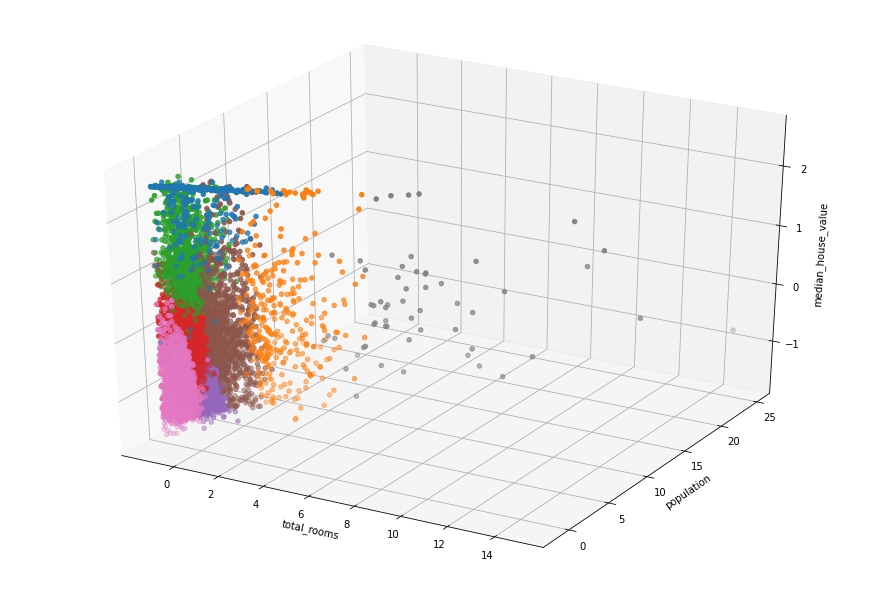

In [190]:
from mpl_toolkits.mplot3d import Axes3D
#total_rooms	population	households	median_income	median_house_value
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
for i in frame['cluster'].unique():
  ax.scatter(frame[frame.cluster==i][0], frame[frame.cluster==i][1], frame[frame.cluster==i][4])
  ax.set_xlabel('total_rooms')
  ax.set_ylabel('population')
  ax.set_zlabel('median_house_value')